# Simple neural network Implementation

In [20]:
# Importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install tensorflow

#### TensorFlow is an open-source machine learning framework developed by Google Brain. It's used for building and training various types of machine learning models, particularly neural networks.

##### Keras is an open-source neural network library written in Python. It's designed to be user-friendly, modular, and easy to extend. Keras acts as an interface for TensorFlow, Theano, or Microsoft Cognitive Toolkit (CNTK), allowing users to define and train neural network models with minimal code.

In [4]:
import tensorflow as tf
from tensorflow import keras 

In [6]:
# Load the Iris dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width','petal-length','petal-width' , 'class']
dataset = pd.read_csv(url , names=names)

In [7]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
# Splitting feature and labels
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [12]:
X , y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [13]:
# Encoding labels
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
#Splitting the dataset into Training set and Test set
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.20 , random_state=42 )

In [17]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

activation='softmax': It specifies the activation function for the output layer. Softmax activation function is commonly used in multi-class classification problems as it converts the raw output scores into probability distributions over the different classes. Each neuron in the output layer will output a probability value between 0 and 1, and the sum of all probabilities will be 1.

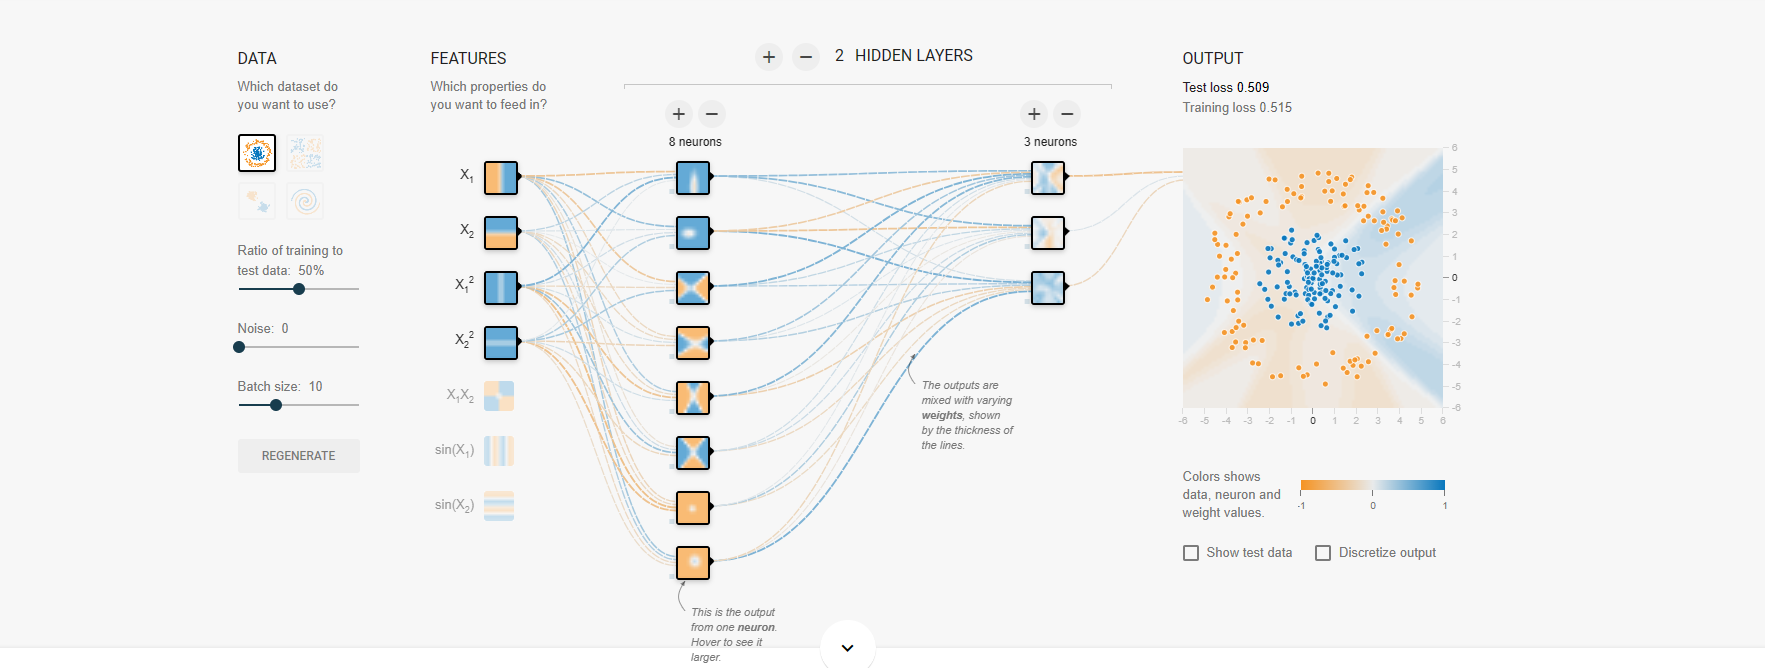

In [23]:
# Creating the neural network model
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(4,), activation='relu'), #Hidden layers with 8 neurons
    keras.layers.Dense(3,activation='softmax') #Output layer with 3 neurons for 3 classes
])

In [24]:
# Compiling the model
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [26]:
#Training the model
model.fit(X_train , y_train , epochs=100 , batch_size=10 , verbose=0)

In [28]:
# Evalating the model 
loss , accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 59ms/step - loss: 0.1509 - accuracy: 0.9667
Accuracy: 0.9666666388511658


In [33]:
# Making Predictions
predictions = model.predict(X_test)
predicted_label = np.argmax(predictions , axis=1)
print("Predicted_label:", predicted_label)

1/1 [==============================] - 0s 34ms/step
Predicted_label: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
